In [1]:
# Hierarchical Clustering
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

In [2]:
# Importing the dataset
dataset = pd.read_csv('numerical.csv')
dataset

,Item,X,Y
0,A1,2,10
1,A2,2,5
2,A3,8,4
3,A4,5,8
4,A5,7,5
5,A6,6,4
6,A7,1,2
7,A8,4,9


In [3]:
X= dataset.iloc[:, [1,2]].values
X

array([[ 2, 10],
       [ 2,  5],
       [ 8,  4],
       [ 5,  8],
       [ 7,  5],
       [ 6,  4],
       [ 1,  2],
       [ 4,  9]], dtype=int64)

single


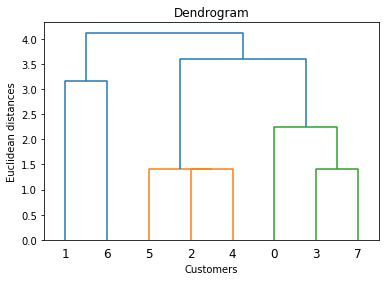

complete


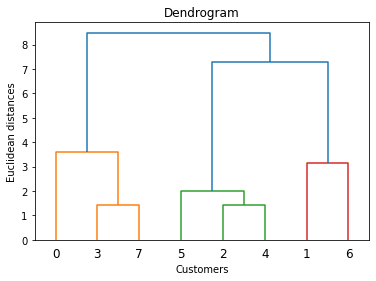

ward


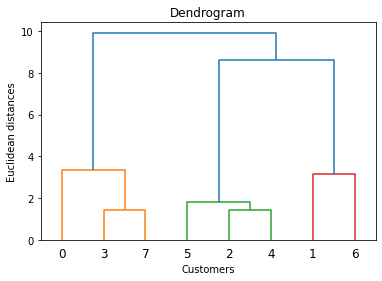

average


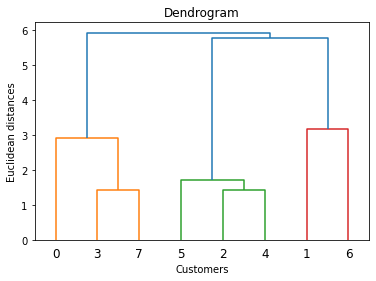

In [4]:
# A loop that iterates over the list `types` and prints the value of `i` in each iteration.
import scipy.cluster.hierarchy as sch
types=['single','complete','ward','average']
for i in types:
    print(i)
    dendrogram = sch.dendrogram(sch.linkage(X, method = i))
    plt.title('Dendrogram')
    plt.xlabel('Customers')
    plt.ylabel('Euclidean distances')
    
    plt.show()

In [5]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering

single


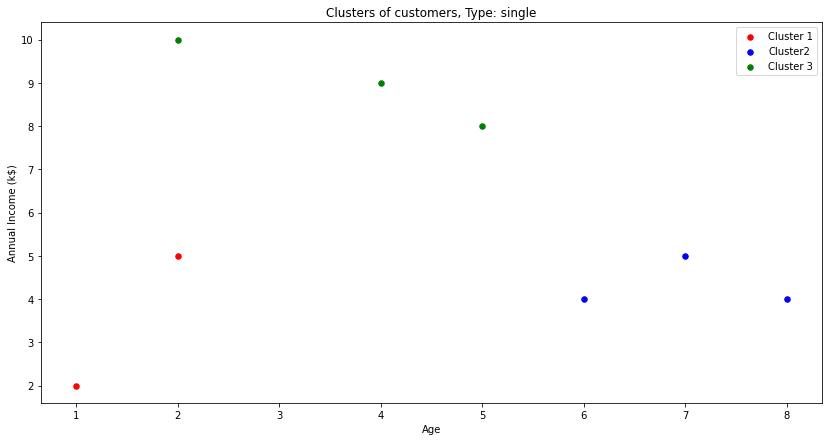

complete


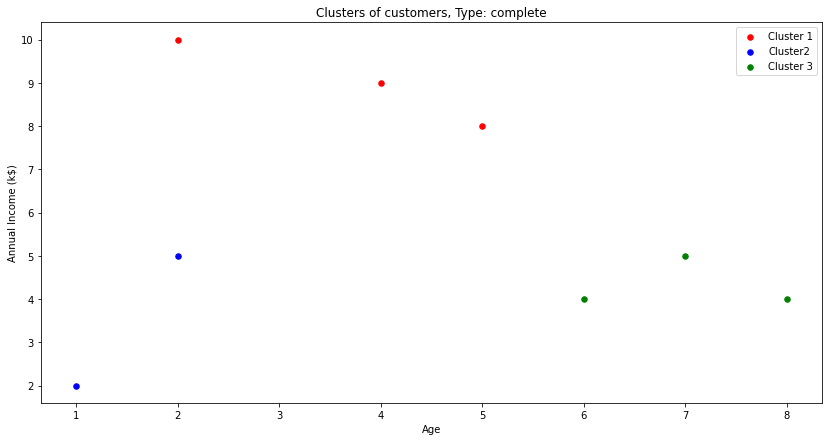

ward


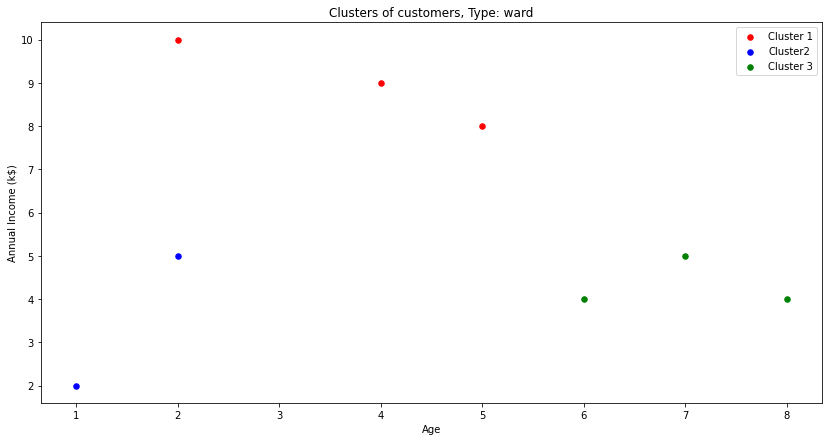

average


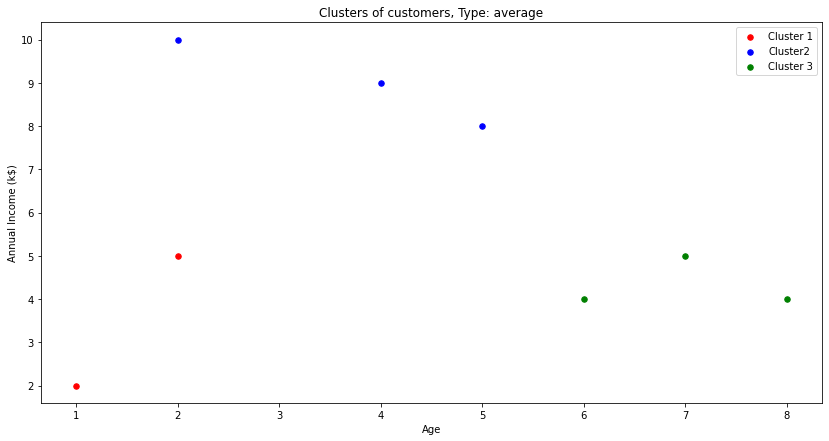

In [15]:
for i in types:
    print(i)
    hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage =i)
    y_hc = hc.fit_predict(X)
    # Visualising the clusters
    plt.figure(figsize=(14,7))
    plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 30, c = 'red', label = 'Cluster 1')
    plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 30, c = 'blue', label = 'Cluster2')
    plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 30, c = 'green', label = 'Cluster 3')
    plt.title('Clusters of customers, Type: '+str(i))
    plt.xlabel('Age')
    plt.ylabel('Annual Income (k$)')
    plt.legend()
    plt.show()

In [7]:
kmeanModel = KMeans(n_clusters=3,init = 'k-means++')
kmeanModel.fit(X)

KMeans(n_clusters=3)

In [8]:
# Predicting labels for the feature set
identified_clusters = kmeanModel.fit_predict(X)
identified_clusters

array([0, 1, 2, 0, 2, 2, 1, 0])

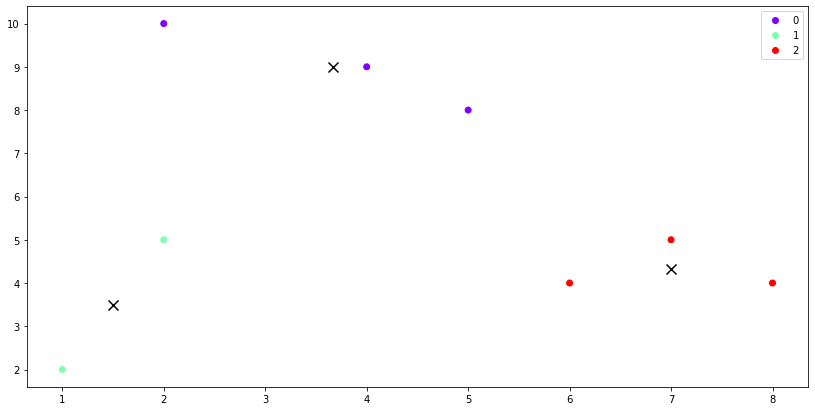

In [9]:
# plot of the centroids and the corresponding cluster
plt.figure(figsize=(14,7))
scatter=plt.scatter(X[:,0], X[:,1], c=identified_clusters, cmap='rainbow')
plt.scatter(kmeanModel.cluster_centers_[:,0], kmeanModel.cluster_centers_[:,1], s=100, c='black', marker='x')
plt.legend(handles=scatter.legend_elements()[0], labels=[0, 1, 2, 3], loc="best");

In [10]:
from sklearn.metrics import silhouette_score

In [11]:
# The silhouette score is a measure of how well a clustering performs. It is calculated by averaging
# the silhouette scores of each sample. The silhouette score is in the range [-1, 1]. A high
# silhouette score means that the clustering performs well.
sil = [0,0]
kmax = 7

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(X)
    labels = kmeans.labels_
    sil.append(silhouette_score(X, labels, metric = 'euclidean'))

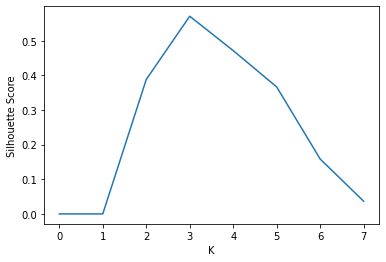

In [12]:
# Plotting the silhouette score for each value of k.
plt.plot(sil)
plt.ylabel('Silhouette Score')
plt.xlabel('K')
plt.show()

In [13]:
def getBestCluster(X,_min=2,_max=7):
    '''
    :param X: The data to be clustered
    :param _min: the minimum number of clusters to try, defaults to 2 (optional)
    :param _max: The maximum number of clusters to consider, defaults to 10 (optional)
    :return: The best number of clusters
    '''
    selected_cluster = 0
    previous_sil_coeff = 0.001 #some random small number not 0
    sc_vals = []
    for n_cluster in range(_min, _max):
        kmeans = KMeans(n_clusters=n_cluster).fit(X)
        label = kmeans.labels_

        sil_coeff = silhouette_score(X, label, metric='euclidean', sample_size=1000)
        sc_vals.append(sil_coeff)
        print("For n_clusters=",n_cluster,", The Silhouette Coefficient is ",sil_coeff)

        percent_change = (sil_coeff-previous_sil_coeff)*100/previous_sil_coeff

        # return when below a threshold of 1%
        if percent_change<1:
            selected_cluster = n_cluster-1

        previous_sil_coeff = sil_coeff

    return selected_cluster or _max, sc_vals

In [14]:
getBestCluster(X)

For n_clusters= 2 , The Silhouette Coefficient is  0.38834298285323554
For n_clusters= 3 , The Silhouette Coefficient is  0.5708086620582917
For n_clusters= 4 , The Silhouette Coefficient is  0.47159245233453273
For n_clusters= 5 , The Silhouette Coefficient is  0.36664911357015373
For n_clusters= 6 , The Silhouette Coefficient is  0.15852567706292603


(5,
 [0.38834298285323554,
  0.5708086620582917,
  0.47159245233453273,
  0.36664911357015373,
  0.15852567706292603])